In [78]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG, display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:50%!important;height:50%!important;}</style>"
HTML(style)

In [79]:
test_iris_data = pd.read_csv('test_iris.csv')

In [80]:
train_iris_data = pd.read_csv('train_iris.csv')

In [81]:
test_iris_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [82]:
X_test = test_iris_data.drop(['Unnamed: 0', 'species'], axis=1)

In [83]:
y_test = test_iris_data.species

In [84]:
X_test.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [85]:
X_train = train_iris_data.drop(['Unnamed: 0', 'species'], axis=1)

In [86]:
y_train = train_iris_data.species

In [92]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
rs = np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [93]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [94]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'], 
                           var_name='set_type', value_name='score')

In [95]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


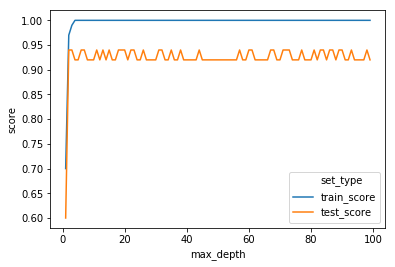

In [96]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [97]:
dogs_n_cats = pd.read_csv('dogs_n_cats.csv')

In [99]:
dogs_n_cats.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [100]:
X_train = dogs_n_cats.drop('Вид', axis=1)

In [102]:
y_train = dogs_n_cats['Вид']

In [103]:
y_train.head()

0    собачка
1    собачка
2    собачка
3    собачка
4    собачка
Name: Вид, dtype: object

In [105]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
rs = np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [107]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'cross_val_score'], 
                           var_name='set_type', value_name='score')

In [108]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
99,1,cross_val_score,1.0
100,2,cross_val_score,1.0
101,3,cross_val_score,1.0
102,4,cross_val_score,1.0
103,5,cross_val_score,1.0
104,6,cross_val_score,1.0
105,7,cross_val_score,1.0
106,8,cross_val_score,1.0
107,9,cross_val_score,1.0
108,10,cross_val_score,1.0


In [109]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [110]:
X_test = pd.read_json('dataset_209691_15.txt')

In [111]:
X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,29,34.8,1,1,0
1,21,25.2,1,1,0
10,28,33.6,1,1,0
11,32,38.4,1,1,0
12,16,19.2,1,1,0


In [113]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
y_predicted = clf.predict(X_test)

In [121]:
y_predicted

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'котик', 'собачка', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'собачка', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'собачка', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'собачка', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'соба

In [119]:
list(y_predicted).count('собачка')

49

In [120]:
y_predicted[y_predicted == 'собачка'].size

49

In [122]:
y_predicted[y_predicted == 'котик'].size

51

In [123]:
pd.Series(y_predicted).value_counts()

котик      51
собачка    49
dtype: int64